<a href="https://colab.research.google.com/github/xxyplxx/STAT1951-Assignment/blob/main/PiliYuan_ModelComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing data

In [ ]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from numpy import arange
from sklearn import datasets
from sklearn import linear_model
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import seaborn as sns
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [ ]:
data = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
data.feature_names
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)

target = pd.DataFrame(data.target, columns=["MEDV"]) 

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
target

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


# Linear Regression



In [ ]:
# Simple Linear Regression
## Without a constant
X = df["RM"]
y = target["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                   3.74e-256
Time:                        12:33:07   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## With a constant
X = df["RM"] 
y = target["MEDV"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           2.49e-74
Time:                        12:33:07   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Multiple Regression
X = df[["RM", "LSTAT"]]
y = target["MEDV"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                        0.00
Time:                        12:33:07   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])

X = df
y = target["MEDV"]

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [ ]:
predictions = lm.predict(X)
print(predictions[0:5])

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423]


In [ ]:
#R-squared
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(predictions,y),mean_squared_error(predictions,y))

0.6498212316698554 21.894831181729202


In [ ]:
lm.coef_ 

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [ ]:
lm.intercept_

36.459488385090125

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Residual')

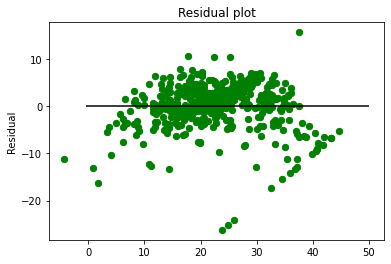

In [ ]:
plt.scatter(predictions, predictions-y, c='g', s = 40)
plt.hlines(y=0, xmin=-0.5, xmax=50)
plt.title('Residual plot')
plt.ylabel('Residual')

# Forward and Backward Selection

## Best Subset Selection

In [ ]:
%matplotlib inline
import pandas as pd
import pandas.testing as tm
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the min RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,13):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 13 models on 1 predictors in 0.042066097259521484 seconds.
Processed 78 models on 2 predictors in 0.22184991836547852 seconds.
Processed 286 models on 3 predictors in 0.8116223812103271 seconds.
Processed 715 models on 4 predictors in 2.0313987731933594 seconds.
Processed 1287 models on 5 predictors in 3.6409828662872314 seconds.
Processed 1716 models on 6 predictors in 4.7079994678497314 seconds.
Processed 1716 models on 7 predictors in 5.081476926803589 seconds.
Processed 1287 models on 8 predictors in 3.9323458671569824 seconds.
Processed 715 models on 9 predictors in 3.239915370941162 seconds.
Processed 286 models on 10 predictors in 1.245917797088623 seconds.
Processed 78 models on 11 predictors in 0.3654060363769531 seconds.
Processed 13 models on 12 predictors in 0.06925296783447266 seconds.
Total elapsed time: 25.601194381713867 seconds.


In [ ]:
models_best

,RSS,model
1,29555.781529,<statsmodels.regression.linear_model.Regressio...
2,15444.934439,<statsmodels.regression.linear_model.Regressio...
3,14343.626020,<statsmodels.regression.linear_model.Regressio...
4,13555.583004,<statsmodels.regression.linear_model.Regressio...
5,13161.006084,<statsmodels.regression.linear_model.Regressio...
6,12895.173642,<statsmodels.regression.linear_model.Regressio...
7,12701.148163,<statsmodels.regression.linear_model.Regressio...
8,12538.094816,<statsmodels.regression.linear_model.Regressio...
9,12439.049646,<statsmodels.regression.linear_model.Regressio...
10,12264.742998,<statsmodels.regression.linear_model.Regressio...


In [ ]:
print(models_best.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                        0.00
Time:                        12:33:33   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
print(getBest(13)["model"].summary())

Processed 1 models on 13 predictors in 0.007902860641479492 seconds.
                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                        0.00
Time:                        12:33:33   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>

In [ ]:
models_best.loc[6, "model"].rsquared

0.9569624831990403

In [ ]:
models_best.apply(lambda row: row[1].rsquared, axis=1)

1     0.901358
2     0.948453
3     0.952128
4     0.954758
5     0.956075
6     0.956962
7     0.957610
8     0.958154
9     0.958485
10    0.959067
11    0.959166
12    0.959189
dtype: float64

Text(0, 0.5, 'BIC')

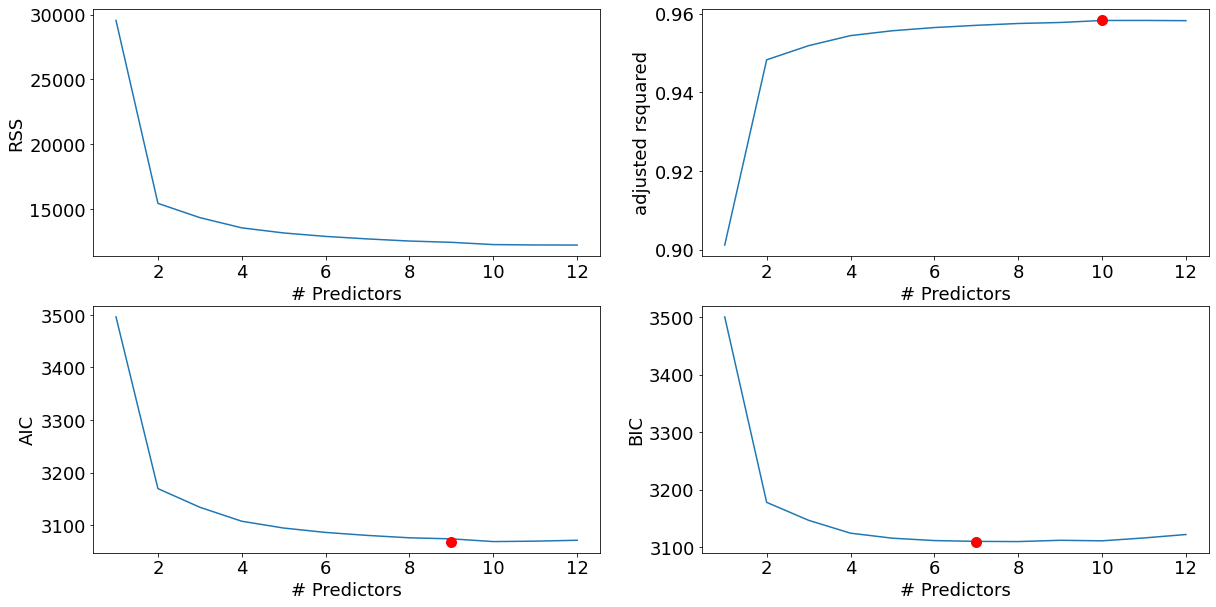

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

## Forward Selection

In [ ]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  13 models on 1 predictors in 0.059264421463012695 seconds.
Processed  12 models on 2 predictors in 0.053276777267456055 seconds.
Processed  11 models on 3 predictors in 0.04076075553894043 seconds.
Processed  10 models on 4 predictors in 0.03022289276123047 seconds.
Processed  9 models on 5 predictors in 0.030176401138305664 seconds.
Processed  8 models on 6 predictors in 0.027321815490722656 seconds.
Processed  7 models on 7 predictors in 0.02483344078063965 seconds.
Processed  6 models on 8 predictors in 0.02085733413696289 seconds.
Processed  5 models on 9 predictors in 0.02535271644592285 seconds.
Processed  4 models on 10 predictors in 0.026018619537353516 seconds.
Processed  3 models on 11 predictors in 0.01487874984741211 seconds.
Processed  2 models on 12 predictors in 0.010979413986206055 seconds.
Processed  1 models on 13 predictors in 0.006265163421630859 seconds.
Total elapsed time: 0.45217180252075195 seconds.


In [ ]:
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                   3.74e-256
Time:                        12:33:35   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We see that using forward stepwise selection, the best one-variable
model contains only `RM`, and the best two-variable model additionally
includes `LSTAT`.

In [ ]:
print(models_best.loc[1, "model"].summary())
print(models_fwd.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                   3.74e-256
Time:                        12:33:35   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Backward Selection

In [ ]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        print(combo)
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
('CRI

In [ ]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[2, "model"].params)

------------
Best Subset:
------------
RM       4.906906
LSTAT   -0.655740
dtype: float64


In [ ]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[13, "model"].params)

-----------------
Foward Selection:
-----------------
RM         5.928148
LSTAT     -0.416304
PTRATIO   -0.392191
B          0.014906
DIS       -0.968514
CHAS       2.853999
ZN         0.048715
CRIM      -0.092897
NOX       -2.868436
INDUS     -0.004060
RAD        0.171151
TAX       -0.009396
AGE       -0.007269
dtype: float64


In [ ]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[12, "model"].params)

-------------------
Backward Selection:
-------------------
CRIM      -0.092808
ZN         0.048813
CHAS       2.848208
NOX       -2.927475
RM         5.931793
AGE       -0.007274
DIS       -0.965462
RAD        0.172304
TAX       -0.009504
PTRATIO   -0.393025
B          0.014914
LSTAT     -0.416504
dtype: float64


# Ridge

In [ ]:
alphas = 10**np.linspace(10,-2,100) * 0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [ ]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

(100, 13)

In [ ]:
alphas[5], 
pd.Series(coefs[5], index=X.columns)

CRIM      -3.352261e-10
ZN         1.147643e-10
INDUS     -5.235931e-10
CHAS       5.123909e-09
NOX       -2.738394e-08
RM         7.349074e-09
AGE       -9.944201e-11
DIS        8.813721e-10
RAD       -3.254606e-10
TAX       -2.064377e-11
PTRATIO   -1.741711e-09
B          2.712315e-11
LSTAT     -7.670731e-10
dtype: float64

Text(0, 0.5, 'weights')

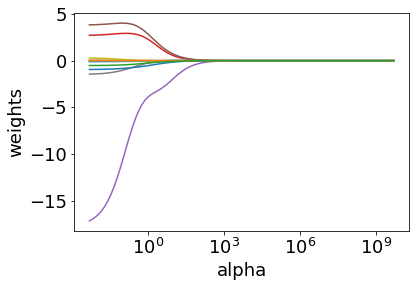

In [ ]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [ ]:
# try alpha = 4
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)           
pred2 = ridge2.predict(X_test)          
print(pd.Series(ridge2.coef_, index = X.columns)) 
print('MSE:',mean_squared_error(y_test, pred2))         

CRIM      -0.040345
ZN         0.013476
INDUS     -0.066937
CHAS       0.558391
NOX       -3.058122
RM         1.319046
AGE       -0.010723
DIS        0.050053
RAD       -0.021414
TAX       -0.001950
PTRATIO   -0.258159
B          0.003399
LSTAT     -0.121375
dtype: float64
MSE: 51.833130147739446


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
# try with bigger alpha, 10**10
ridge3 = Ridge(alpha = 10**10, normalize =True)
ridge3.fit(X_train, y_train)        
pred3 = ridge3.predict(X_test)       
print(pd.Series(ridge3.coef_, index = X.columns)) 
print('MSE:',mean_squared_error(y_test, pred3))

CRIM      -4.024631e-11
ZN         1.474970e-11
INDUS     -7.183047e-11
CHAS       2.647661e-10
NOX       -3.497055e-09
RM         9.037372e-10
AGE       -1.349357e-11
DIS        1.391119e-10
RAD       -3.785895e-11
TAX       -2.437473e-12
PTRATIO   -2.043905e-10
B          3.302125e-12
LSTAT     -9.060743e-11
dtype: float64
MSE: 88.69819208540774


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
# try with alpha = 0
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)        
pred = ridge2.predict(X_test)          
print(pd.Series(ridge2.coef_, index = X.columns)) 
print('MSE:',mean_squared_error(y_test, pred))          

CRIM       -0.103895
ZN          0.065682
INDUS      -0.009888
CHAS        1.449889
NOX       -17.237149
RM          3.313326
AGE         0.010895
DIS        -1.375538
RAD         0.323677
TAX        -0.012013
PTRATIO    -0.820441
B           0.008690
LSTAT      -0.528748
dtype: float64
MSE: 22.8392870386404


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
# Use Ridgecv to choose the tuning parameter alpha 
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.03527401155359316

In [ ]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


23.271577731393062

In [ ]:
# Using the alpha chosen by cross-validation, examine the coefficient estimates.
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


CRIM       -0.095410
ZN          0.037889
INDUS      -0.019015
CHAS        2.837895
NOX       -14.350346
RM          3.955089
AGE        -0.002164
DIS        -1.278671
RAD         0.207283
TAX        -0.007828
PTRATIO    -0.897622
B           0.009215
LSTAT      -0.496485
dtype: float64

# Lasso

In [ ]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

Text(0, 0.5, 'weights')

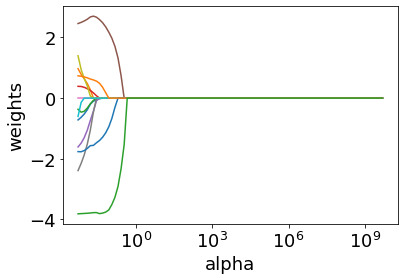

In [ ]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

22.85286379130923

In [ ]:
pd.Series(lasso.coef_, index=X.columns)

CRIM       -0.098992
ZN          0.061388
INDUS      -0.017673
CHAS        1.448711
NOX       -16.564945
RM          3.358570
AGE         0.008974
DIS        -1.328103
RAD         0.295264
TAX        -0.010555
PTRATIO    -0.819016
B           0.008613
LSTAT      -0.525586
dtype: float64

# Elastic Net

In [ ]:
# define model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 3.682 (0.530)


## Grid search

In [ ]:
# Grid search hyperparameters for the elastic net
# define model
model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.378
Config: {'alpha': 0.01, 'l1_ratio': 0.97}


In [ ]:
# automatically configured elastic net algorithm
# define model
ratios = arange(0.1, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

alpha: 0.000010
l1_ratio_: 0.300000


# PCR

In [ ]:
pca = PCA() 
X_reduced = pca.fit_transform(scale(X)) 
pd.DataFrame(pca.components_.T) 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.250951,-0.315252,0.246566,0.061771,0.082157,-0.219660,0.777607,0.153350,0.260390,0.019369,-0.109644,0.086761,0.045952
1,-0.256315,-0.323313,0.295858,0.128712,0.320617,-0.323388,-0.274996,-0.402680,0.358137,0.267527,0.262756,-0.071425,-0.080919
2,0.346672,0.112493,-0.015946,0.017146,-0.007811,-0.076138,-0.339576,0.173932,0.644416,-0.363532,-0.303169,-0.113200,-0.251077
3,0.005042,0.454829,0.289781,0.815941,0.086531,0.167490,0.074136,-0.024662,-0.013728,-0.006182,0.013927,-0.003983,0.035922
4,0.342852,0.219116,0.120964,-0.128226,0.136854,-0.152983,-0.199635,0.080121,-0.018522,0.231056,0.111319,0.804323,0.043630
5,-0.189243,0.149332,0.593961,-0.280592,-0.423447,0.059267,0.063940,-0.326752,0.047898,-0.431420,0.053162,0.152873,0.045567
6,0.313671,0.311978,-0.017675,-0.175206,0.016691,-0.071709,0.116011,-0.600823,-0.067562,0.362779,-0.459159,-0.211936,-0.038551
7,-0.321544,-0.349070,-0.049736,0.215436,0.098592,0.023439,-0.103900,-0.121812,-0.153291,-0.171213,-0.695693,0.390941,-0.018299
8,0.319793,-0.271521,0.287255,0.132350,-0.204132,-0.143194,-0.137943,0.080358,-0.470891,0.021909,0.036544,-0.107026,-0.633490
9,0.338469,-0.239454,0.220744,0.103335,-0.130461,-0.192934,-0.314887,0.082774,-0.176563,-0.035168,-0.104836,-0.215191,0.720233


In [ ]:
expLianedVariance=(pca.explained_variance_/pca.explained_variance_.sum())*100
expLianedVarianceCum=expLianedVariance.cumsum()
pd.DataFrame( expLianedVarianceCum, expLianedVariance)

,0
47.129606,47.129606
11.025193,58.154800
9.558590,67.713389
6.596732,74.310121
6.421661,80.731782
5.056978,85.788760
4.118124,89.906884
3.046902,92.953786
2.130333,95.084120
1.694137,96.778257


In [ ]:
expLianedVariance.size

13

(0.0, 20.0)

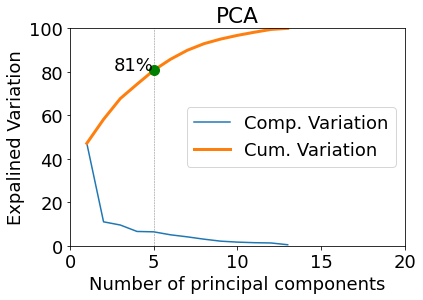

In [ ]:
xlabel=range(1, expLianedVariance.size+1)
xlabel=np.reshape( np.asarray(list(xlabel)), (13,))
N_PC_sel=5
variance_N_PC= expLianedVarianceCum[N_PC_sel-1]
plt.figure( )

plt.plot(list(xlabel),expLianedVariance, label='Comp. Variation')
plt.plot(list(xlabel),expLianedVarianceCum, label = 'Cum. Variation', linewidth=3)
#Vertical line at the selected no of components
plt.axvline(x=N_PC_sel, linestyle='dashed',linewidth=.5, color='grey')
# add apoint
plt.plot(N_PC_sel,variance_N_PC, color='green', marker='o')
plt.text(N_PC_sel,variance_N_PC,"{0:.0%}".format(variance_N_PC/100.0), horizontalalignment='right')

plt.legend()
plt.title('PCA')
plt.xlabel('Number of principal components')
plt.ylabel('Expalined Variation')
plt.ylim([0,100])
plt.xlim([0,20])

In [ ]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,0.250951,-0.315252,0.246566,0.061771,0.082157,-0.219660
1,-0.256315,-0.323313,0.295858,0.128712,0.320617,-0.323388
2,0.346672,0.112493,-0.015946,0.017146,-0.007811,-0.076138
3,0.005042,0.454829,0.289781,0.815941,0.086531,0.167490
4,0.342852,0.219116,0.120964,-0.128226,0.136854,-0.152983


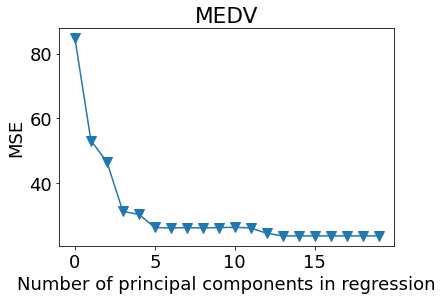

In [ ]:
# 10-fold CV, with shuffle
from sklearn.model_selection import KFold
n = len(X_reduced)
kf_10 = KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('MEDV')
plt.xlim(xmin=-1);

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 47.13,  58.16,  67.72,  74.32,  80.74,  85.8 ,  89.92,  92.97,
        95.1 ,  96.79,  98.22,  99.52, 100.01])

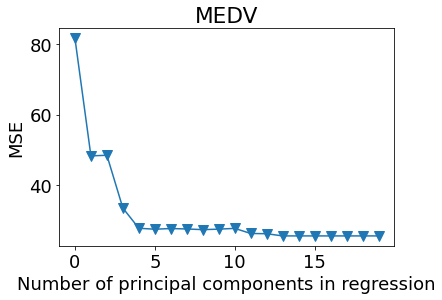

In [ ]:
pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('MEDV')
plt.xlim(xmin=-1);

In [ ]:
X_reduced_test = pca2.transform(scale(X_test))[:,:13]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:13], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

23.285152655752515

# PLS

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning: As of version 0.24, n_components(14) should be in [1, n_features].n_components=13 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning: As of version 0.24, n_components(14) should be in [1, n_features].n_components=13 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning: As of version 0.24, n_components(14) should be in [1, n_features].n_components=13 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning: As of version 0.24, n_components(14) should be in [1, n_features].n_component

(-1.0, 19.9)

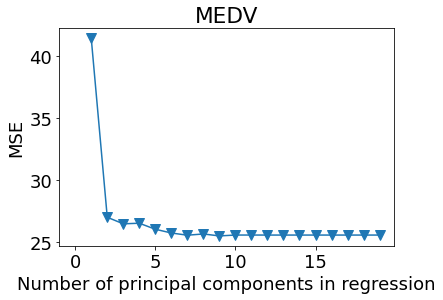

In [ ]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('MEDV')
plt.xlim(xmin=-1)

In [ ]:
pls = PLSRegression(n_components=8)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

23.197217079839124

# Model Comparison

LR: 0.718176 (0.065216)
Ridge: 0.716731 (0.067140)
Lasso: 0.662844 (0.065057)
ElasticNet: 0.668510 (0.067609)
PLS: 0.692793 (0.075540)


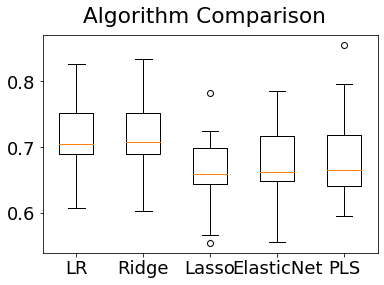

In [ ]:
# Compare Algorithms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import explained_variance_score

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
Y = raw_df.values[1::2, 2]

# prepare configuration for cross validation test harness
seed = 6
# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
# models.append(('PCR', PCA())) # the PCA model has super low results PCR: -36.266416 (0.586096)
models.append(('PLS', PLSRegression()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From these results, it would suggest that both linear regression and ridge regression are perhaps worthy of further study on this problem.